# Analysis of  Loan Repayment of data

## Exploring the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data is loan data
data=pd.read_csv('loan_data.csv')

In [3]:
data.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


# List of available data
credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [4]:
data.columns.tolist()

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [5]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


(9578, 14)

### checking for duplicate rows and missing valuesin the data

In [6]:
data.duplicated().sum()

0

In [7]:
data.isna()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9574,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9575,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9576,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### checking for abnormal trends in data

In [8]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
# Comparing how many people have not fully paid the loan and how many paid.
print(data.groupby('not.fully.paid').size())

not.fully.paid
0    8045
1    1533
dtype: int64


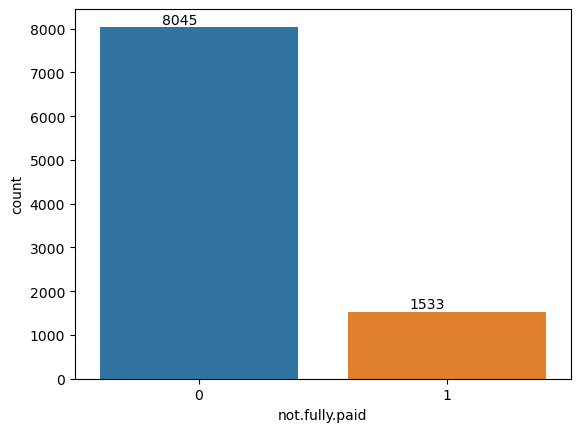

In [10]:
count =sns.countplot(x='not.fully.paid', data=data)
for p in count.patches:
    count.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [11]:
#checking weather we need the feature 'purpose' or we can drop it
print(data.groupby('purpose').size())

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64


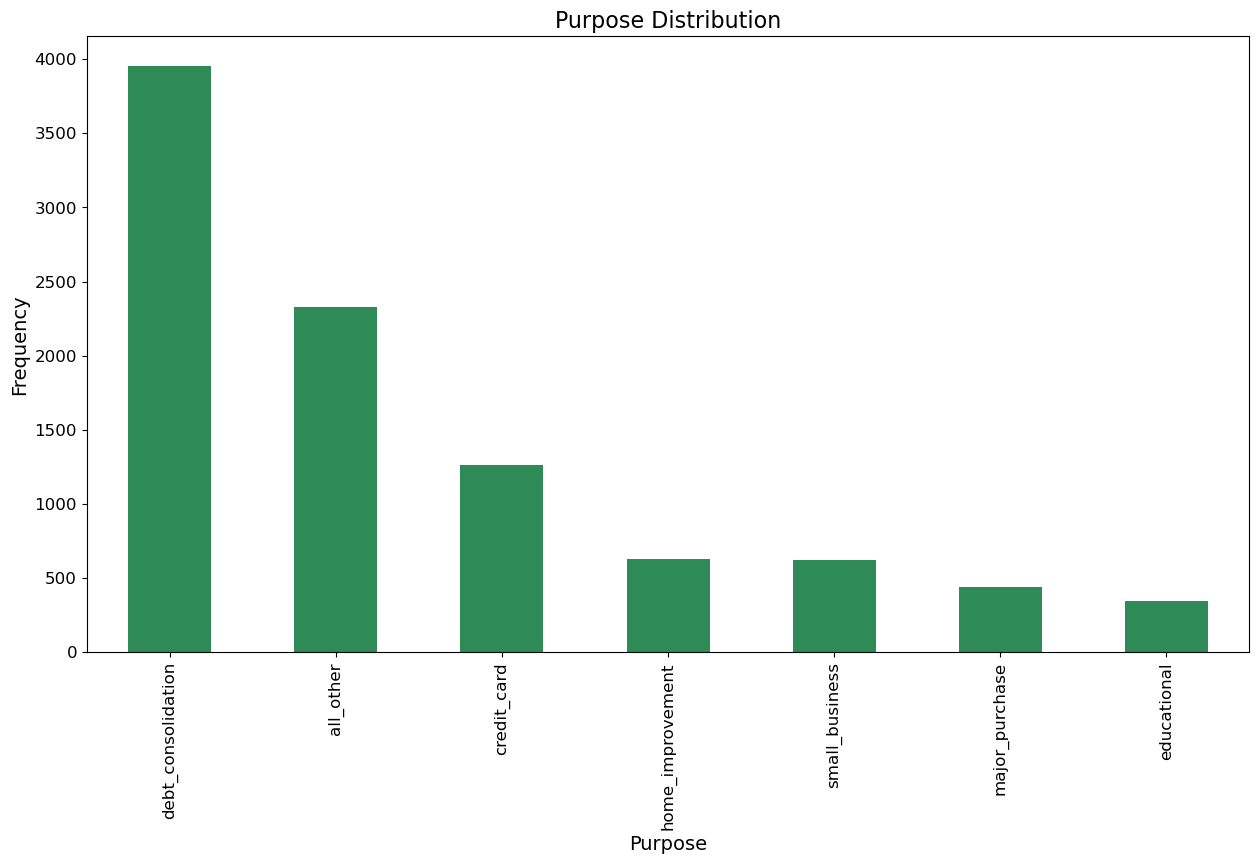

In [12]:
plt.figure(figsize = (15,8))
data['purpose'].value_counts().plot.bar(color='seagreen')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Purpose', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.title(label='Purpose Distribution', size=16)
plt.show()

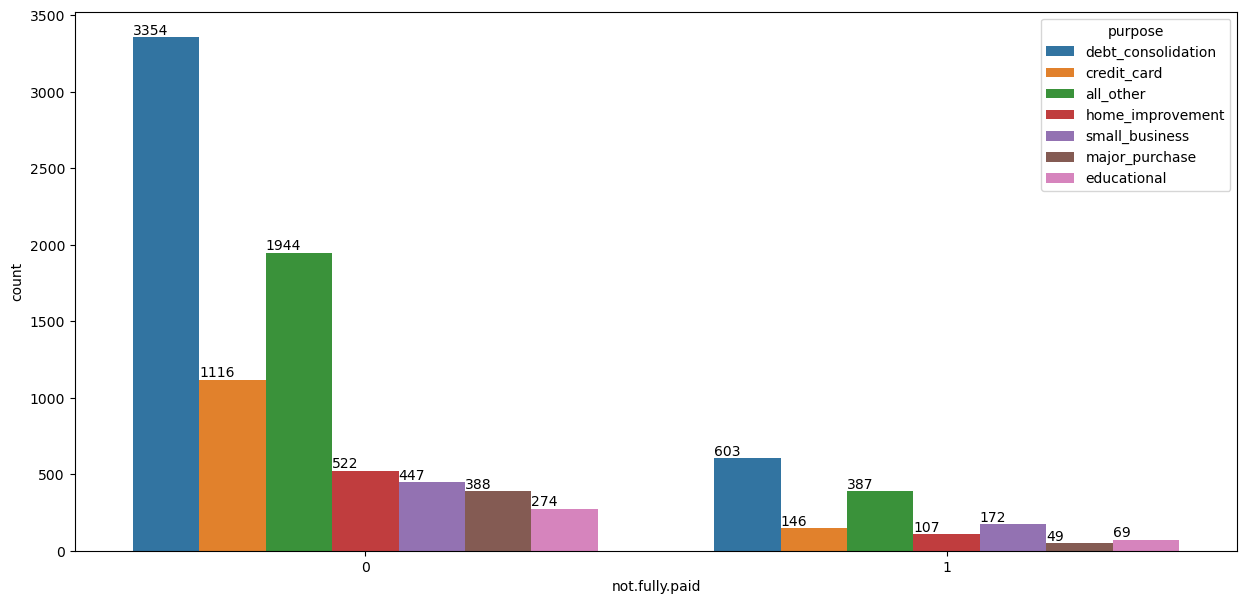

In [13]:
plt.figure(figsize = (15,7))
ax= sns.countplot(x='not.fully.paid', hue='purpose', data=data ,ax=None)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+1), va='bottom',
                    color= 'black')

In [14]:
# Import label encoder 

from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

col = list(data.columns)  
for a in col:
    if data[a].dtype==object:
        data[a]= le.fit_transform(data[a])

In [15]:
data["purpose"]=data["purpose"].astype(object)
data["delinq.2yrs"]=data["delinq.2yrs"].astype(object)
data["pub.rec"]=data["pub.rec"].astype(object)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   object 
 12  pub.rec            9578 non-null   object 
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.0+ MB


In [17]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


we can observe that almost same fraction people did not fully pay the loan in all catogeries of purpose.

so lets remove the feature purpose it

### Creating sample data

In [18]:
data_sample=data.sample(n=300,replace=False, weights=None, random_state=2, axis=0)

In [19]:
data_sample

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5539,1,2,0.1287,121.08,11.238436,1.58,692,3391.000000,12135,85.5,3,0,0,0
3455,1,1,0.1322,202.81,10.308953,5.20,682,1684.958333,6001,31.8,0,0,0,0
3230,1,3,0.1442,221.77,10.341742,20.48,672,2070.000000,18065,87.7,0,0,0,0
426,1,1,0.1078,261.08,11.264464,16.75,692,4290.041667,50908,37.1,0,2,0,0
2101,1,2,0.1442,687.66,11.472103,7.09,707,4771.000000,10047,70.3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,1,1,0.1474,55.26,9.210340,18.12,667,1710.000000,5704,80.3,0,0,0,0
3599,1,2,0.1379,170.38,10.341742,19.78,682,1229.958333,6130,57.3,3,0,0,0
6819,1,5,0.0774,312.19,10.933107,9.02,777,6514.000000,5875,7.1,1,0,0,0
7994,0,6,0.1059,650.90,11.532728,2.55,707,1590.041667,8702,51.7,11,0,0,0


In [20]:
data_sample.info()
data_sample.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 5539 to 7910
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      300 non-null    int64  
 1   purpose            300 non-null    object 
 2   int.rate           300 non-null    float64
 3   installment        300 non-null    float64
 4   log.annual.inc     300 non-null    float64
 5   dti                300 non-null    float64
 6   fico               300 non-null    int64  
 7   days.with.cr.line  300 non-null    float64
 8   revol.bal          300 non-null    int64  
 9   revol.util         300 non-null    float64
 10  inq.last.6mths     300 non-null    int64  
 11  delinq.2yrs        300 non-null    object 
 12  pub.rec            300 non-null    object 
 13  not.fully.paid     300 non-null    int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 35.2+ KB


(300, 14)

### Correlation matrix and plots

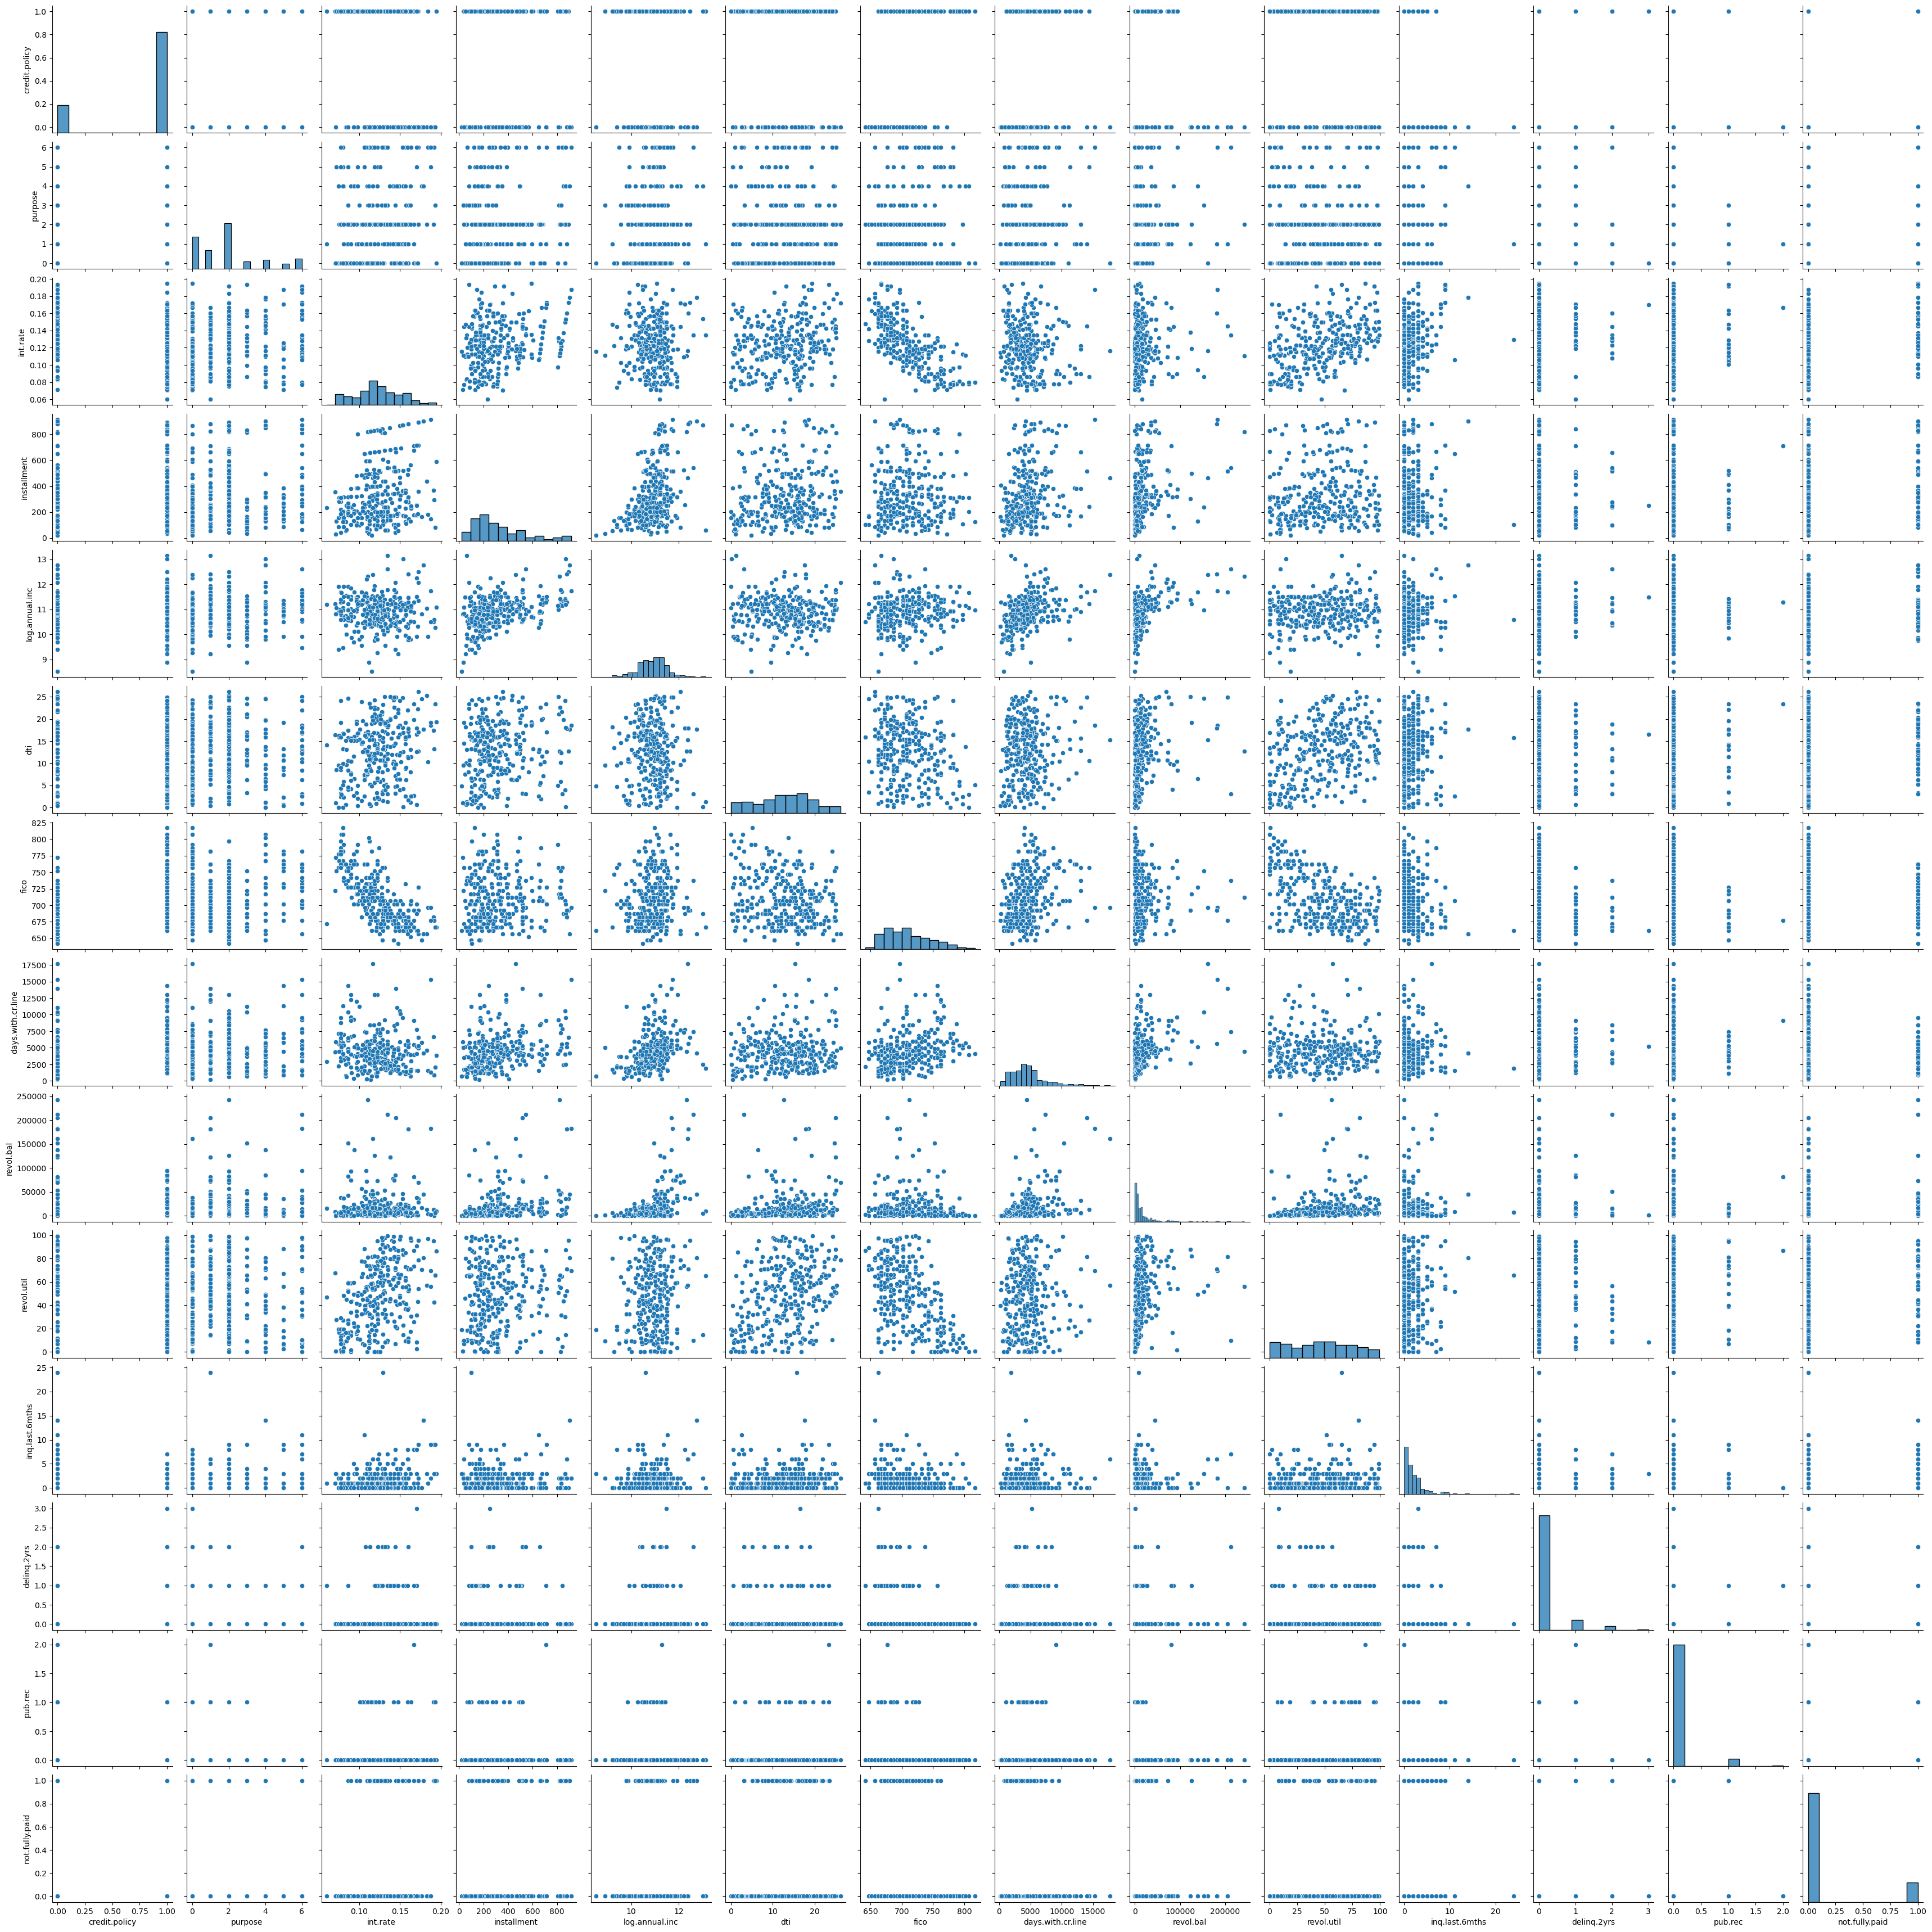

In [21]:
sns.pairplot(data_sample)

In [22]:
data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_23472\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.149452


C:\Users\User\AppData\Local\Temp\ipykernel_23472\3015241699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


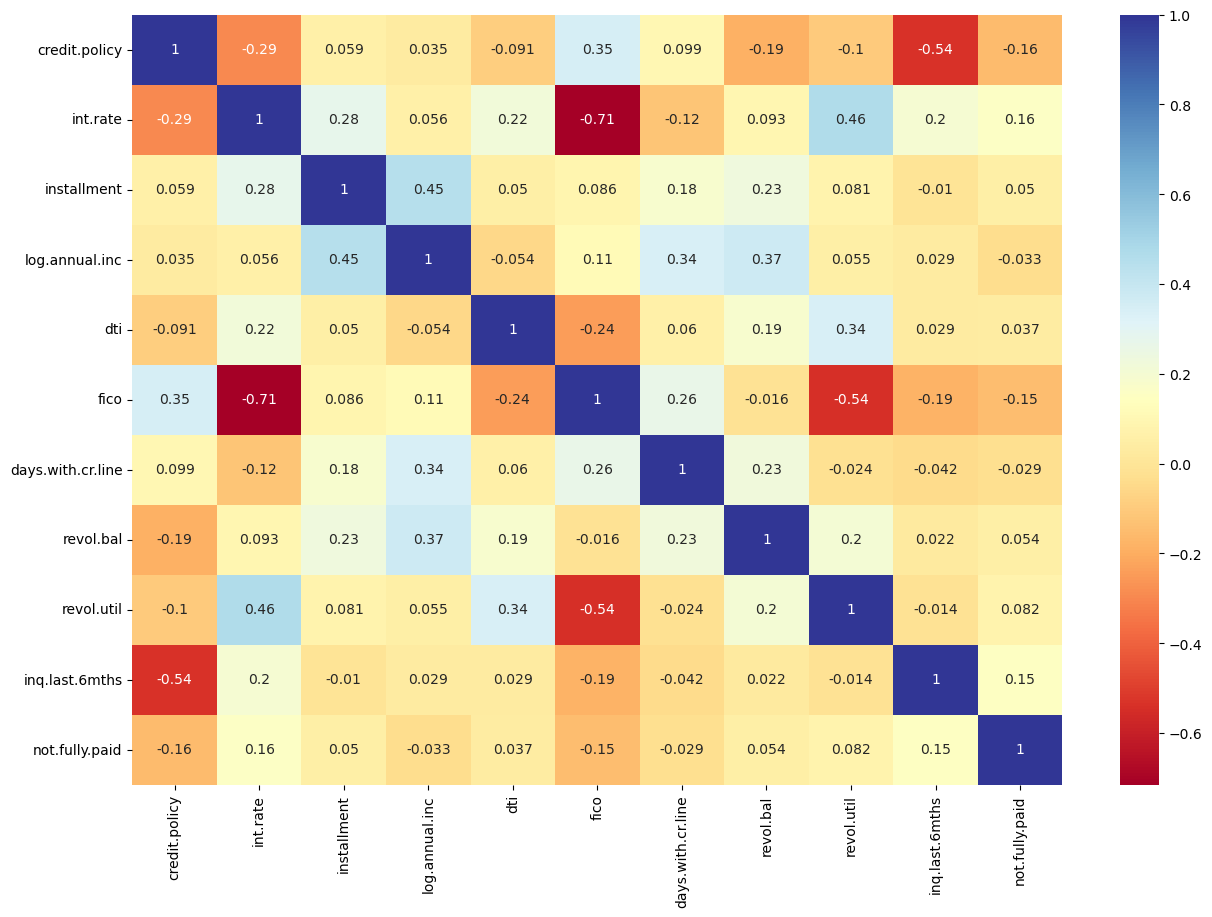

In [23]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlBu")

We observe that,

fico score has corelations with lot of other features

fico score and int.rateare highly correlated

systolic creadit.policy and inq.last.6mths are highly correlated


Text(0.5, 1.0, 'Relationship between int.rate, fico and not.fully.paid')

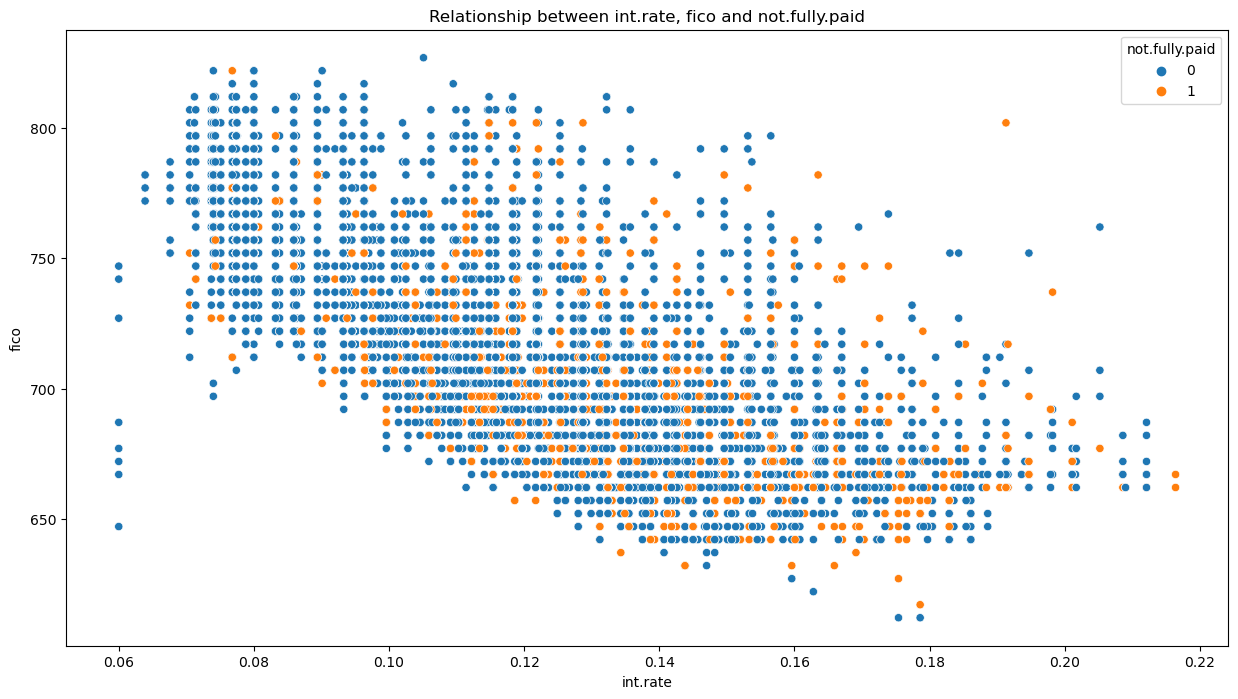

In [24]:
#correlation between int.rate, fico score and not.fully.paid
plt.figure(figsize=(15,8))
sns.scatterplot(x='int.rate', y='fico', hue='not.fully.paid', data = data)
plt.title('Relationship between int.rate, fico and not.fully.paid')

In [25]:
data.shape

(9578, 14)

In [26]:
data_sample.shape

(300, 14)

### Feature Importance

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

x = data.iloc[:, :13]
y = data.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k=10).fit(x,y)
df_featurescores = pd.DataFrame(SelectKBest(score_func=chi2, k=10).fit(x,y).scores_)
df_columns= pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns,df_featurescores],axis=1)
feature_scores.columns = ['Attribute','Score']
feature_scores= feature_scores.sort_values(by='Score', ascending=False)
feature_scores

,Attribute,Score
8,revol.bal,1.860498e+06
7,days.with.cr.line,1.119078e+04
3,installment,3.211572e+03
9,revol.util,1.160848e+03
10,inq.last.6mths,6.564686e+02
6,fico,4.351062e+02
5,dti,5.025229e+01
0,credit.policy,4.670311e+01
1,purpose,3.217312e+01
12,pub.rec,2.505498e+01


In [28]:
data.shape

(9578, 14)

In [29]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1



## Sample model pipeline to choose the algorithm to use

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [31]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, :13]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [32]:
data.shape

(9578, 14)

In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score



classifiers = [LogisticRegression(),SVC(kernel='rbf'),DecisionTreeClassifier(),KNeighborsClassifier(2), GaussianNB()]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(x_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(x_test, y_test)*100)))

The accuracy score of LogisticRegression() is: 83.14%
The accuracy score of SVC() is: 83.14%
The accuracy score of DecisionTreeClassifier() is: 74.58%
The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 81.78%
The accuracy score of GaussianNB() is: 81.78%


### We see that svc is the better options. Let's choose that 


### Cross validating the results using 5-fodata cross validation

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [36]:
from sklearn.model_selection import cross_val_score

cross_val_result = cross_val_score(svm_clf, x, y, cv=5) 

print ("Cross-validated scores:", cross_val_result)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cross_val_result.mean() * 100))

Cross-validated scores: [0.83977035 0.83977035 0.83977035 0.84020888 0.81984334]
The Accuracy of Model with Cross Validation is: 83.59%


# The Accuracy of Model with Cross Validation is: 83.59%

##### Part second
The dataset define as a loans for further  next modeling.

In [39]:
loans = pd.read_csv('loan_data.csv')

In [40]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [41]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [42]:
loans.isnull().sum()
# NO MISSING VALUES
# with no missing values, we'll turn to the columns and see if any should be dropped or edited.

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [43]:
# not fully paid, with a score of 1 or 0, will be our target value and the variable we want to predict

In [44]:
# let's observe the one 'object' data type
loans['purpose'].nunique()
# With 7 unique values that may correlate with our target value, we'll turn it into a dummy variable

7

In [45]:
purpose_ = pd.get_dummies(loans['purpose'],drop_first=True)
public_record  = pd.get_dummies(loans['pub.rec'],drop_first=True)

In [46]:
# drop the original columns that we're replacing with dummy variables 
loans.drop(['purpose','pub.rec'],axis=1,inplace=True)

In [47]:
# dummy decider
# loans['pub.rec'].unique()

In [48]:
loans = pd.concat([loans,purpose_,public_record],axis=1)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,debt_consolidation,educational,home_improvement,major_purchase,small_business,1,2,3,4,5
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,...,1,0,0,0,0,0,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,...,0,0,0,0,0,0,0,0,0,0


# 2. :::Model Selection and Execution:::
2.0 Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(loans.drop('not.fully.paid',axis=1), 
                                                    loans['not.fully.paid'], test_size=0.30)

In [51]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [52]:
from sklearn.linear_model import LogisticRegression  # Importing logistic regression from sklearn

logmodel = LogisticRegression()  # Creating an instance of Logistic Regression model

logmodel.fit(X_train, y_train)  # Fitting the model to the training data


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
predictions = logmodel.predict(X_test)

In [54]:
#Evaluate the Results
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
logistic_confusion_matrix = confusion_matrix(y_test,predictions)
logistic_classification_report = classification_report(y_test,predictions)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2425    3]
 [ 444    2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2428
           1       0.40      0.00      0.01       446

    accuracy                           0.84      2874
   macro avg       0.62      0.50      0.46      2874
weighted avg       0.78      0.84      0.77      2874



# 2.2 Decision Trees
#Train and Predict

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
#Evaluate the Results
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
decision_tree_confusion_matrix = confusion_matrix(y_test,predictions)
decision_tree_classification_report = (classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2037  391]
 [ 344  102]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2428
           1       0.21      0.23      0.22       446

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.75      2874



# 2.3 Random Forests
#Train and Predict

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [59]:
predictions = rfc.predict(X_test)

In [60]:
#Evaluate the Results
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
random_forests_confusion_matrix = confusion_matrix(y_test,predictions)
random_forests_classification_report = classification_report(y_test,predictions)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2423    5]
 [ 443    3]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2428
           1       0.38      0.01      0.01       446

    accuracy                           0.84      2874
   macro avg       0.61      0.50      0.46      2874
weighted avg       0.77      0.84      0.78      2874



# Let's compare the results of all three models together¶

In [62]:
print(logistic_confusion_matrix) 
print(logistic_classification_report)

print(decision_tree_confusion_matrix) 
print(decision_tree_classification_report)

print(random_forests_confusion_matrix) 
print(random_forests_classification_report)

[[2425    3]
 [ 444    2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2428
           1       0.40      0.00      0.01       446

    accuracy                           0.84      2874
   macro avg       0.62      0.50      0.46      2874
weighted avg       0.78      0.84      0.77      2874

[[2037  391]
 [ 344  102]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2428
           1       0.21      0.23      0.22       446

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.75      2874

[[2423    5]
 [ 443    3]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2428
           1       0.38      0.01      0.01       446

    accuracy                           0.84      2874
   macro avg       0.61      0.50      0.46    

# Final Result

# Random Forests is a best model from the above explained models.
An important point to note is that our model was heavily more balanced towards positive cases. Our target class was not balanced, which would expectedly result in a model's ability to better predict the more highly represented instance of the variable.¶